In [18]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

%matplotlib inline

In [19]:
df=pd.read_csv('USArrests.csv')

In [20]:
df.columns=['State','Murder','Assault','UrbanPop','Rape']

In [21]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [7]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

### Not surprisingly, the variables also have vastly different variances: the UrbanPop variable measures the
percentage of the population in each state living in an urban area, which is not a comparable number to the
number of crimes committeed in each state per 100,000 individuals. If we failed to scale the variables before
performing PCA, then most of the principal components that we observed would be driven by the Assault
variable, since it has by far the largest mean and variance.
Thus, it is important to standardize the variables to have mean zero and standard deviation 1 before
performing PCA. W

In [22]:
#can't scale a string variable so removing the state variable
del df['State']

In [9]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [54]:
#Without scaling
X = df#pd.DataFrame(scale(df)

In [10]:
PCA().fit(X).components_.T

array([[ 0.53589947,  0.41818087, -0.34123273,  0.6492278 ],
       [ 0.58318363,  0.1879856 , -0.26814843, -0.74340748],
       [ 0.27819087, -0.87280619, -0.37801579,  0.13387773],
       [ 0.54343209, -0.16731864,  0.81777791,  0.08902432]])

In [11]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


## We see that there are four distinct principal components. This is to be expected because there are in general min(n − 1, p) informative principal components in a data set with n observations and p variables

In [12]:
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


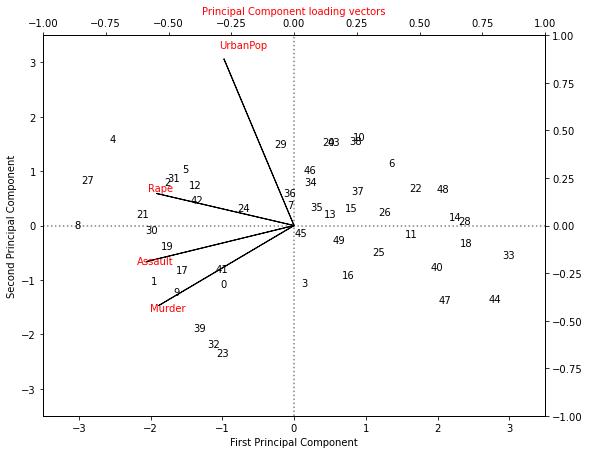

In [13]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [23]:
pca.explained_variance_

array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [15]:
pca.explained_variance_ratio_
# We see that the first principal component explains 62.0% of the variance in the data, the next principal
# component explains 24.7% of the variance, and so forth. We can plot the PVE explained by each component
# as follows:

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x7f913a186ca0>,
 <a list of 4 Text major ticklabel objects>)

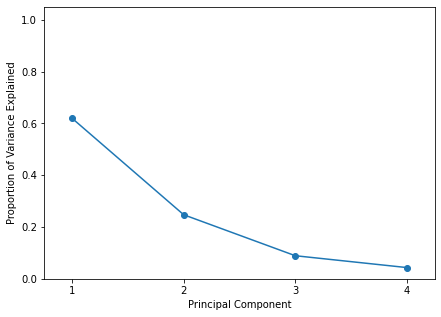

In [16]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
# We can also use the function cumsum(), which computes the cumulative sum of the elements of a numeric
# vector, to plot the cumulative PVE:

([<matplotlib.axis.XTick at 0x7f913a42e880>,
 <a list of 4 Text major ticklabel objects>)

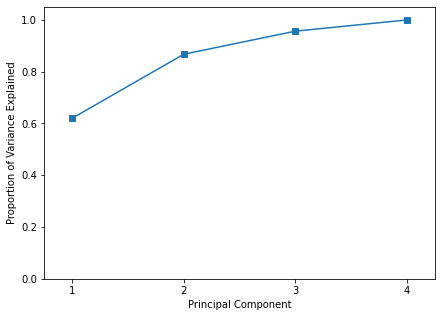

In [17]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])